In [2]:
#!pip install geopandas

In [3]:
import os
import time
from datetime import date, timedelta

import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup

import io
import re
import itertools
import zipfile

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gp
import numpy as np
import sys

from matplotlib import cm
import geopandas

In [4]:
pays = pd.read_excel("PaysdAfrique.xlsx")

In [5]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [6]:
evolution = pd.read_excel("regionsAfrique.xlsx")

In [7]:
evolution.head()

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,Cervix2002,Cervix2008,Cervix2012,Cervix2018,Cervix2002Mort,Cervix2008Mort,Cervix2012Mort,Cervix2018Mort,Unnamed: 18,Prost2002,Prost2008,Prost2012,Prost2018,Prost2002Mort,Prost2008Mort,Prost2012Mort,Prost2018Mort,Unnamed: 27,Lung_C2M,Lung_C2F,Lung_C8M,Lung_C8F,Lung_C12M,Lung_C12F,Lung_C18M,Lung_C18F,Unnamed: 36,St_C2M,St_C2F,St_C8M,...,Cr_C12M,Cr_C12F,Cr_C18M,Cr_C18F,Unnamed: 54,Es_C2M,Es_C2F,Es_C8M,Es_C8F,Es_C12M,Es_C12F,Es_C18M,Es_C18F,Unnamed: 63,Liver 2002 M,Liver 2002 F,Liver 2008 M,Liver 2008 F,Liver 2012 M,Liver 2012 F,Liver 2018 M,Liver 2018 F,Unnamed: 72,Bladder 2002 M,Bladder 2002 F,Bladder 2008 M,Bladder 2008 F,Bladder 2012 M,Bladder 2012 F,Bladder 2018 M,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
0,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,12.1,6.6,6.6,7.2,9.8,4.0,3.2,5.1,NaN,5.8,8.1,10.6,13.2,4.9,6.2,7.0,5.8,NaN,12.0,2.2,14.9,2.2,15.6,3.1,16.9,3.4,NaN,4.4,2.5,3.9,...,8.5,6.9,9.5,8.2,NaN,2.1,1.4,2.0,1.6,2.4,1.5,1.7,1.4,NaN,4.2,2.2,7.5,2.5,18.0,7.0,20.8,7.8,NaN,20.3,3.6,NaN,NaN,15.1,3.2,14.3,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
1,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,29.3,33.7,29.3,29.6,23.8,24.0,18.5,23.0,NaN,19.3,22.2,25.1,31.9,16.0,18.3,21.2,18.6,NaN,2.4,0.6,3.1,1.2,1.7,1.1,2.4,1.2,NaN,3.4,3.6,4.5,...,4.5,3.8,6.0,5.1,NaN,1.3,0.6,1.4,1.0,0.8,0.4,1.6,0.8,NaN,15.3,5.6,16.5,8.1,16.4,8.1,11.1,5.7,NaN,4.0,1.4,NaN,NaN,2.1,1.3,2.3,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
2,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,28.0,23.0,30.6,26.8,23.0,17.0,22.2,21.1,NaN,24.5,16.4,27.0,35.9,21.1,13.4,24.2,22.7,NaN,4.7,0.7,2.8,0.9,2.0,0.8,3.8,2.3,NaN,13.4,12.6,5.3,...,4.7,4.8,6.6,6.1,NaN,1.5,0.2,1.5,0.8,4.2,2.0,2.1,1.7,NaN,27.8,13.4,18.9,9.6,10.5,5.7,9.4,3.9,NaN,1.9,0.5,NaN,NaN,2.2,1.3,1.3,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
3,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,42.7,34.5,42.7,40.1,34.6,25.3,27.6,30.0,NaN,13.8,14.5,23.3,23.9,11.8,11.7,18.7,14.8,NaN,3.6,2.2,4.1,1.4,3.8,2.2,3.4,2.2,NaN,7.4,5.5,5.6,...,7.1,6.1,7.2,6.8,NaN,19.1,8.0,14.9,6.4,11.9,7.8,9.7,7.1,NaN,21.1,8.6,7.2,3.6,4.8,3.3,6.2,3.6,NaN,4.6,3.7,NaN,NaN,3.3,2.0,3.2,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
4,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,38.2,26.8,31.5,43.1,22.6,14.8,17.9,20.0,NaN,40.5,53.9,61.8,64.1,22.4,19.3,24.4,26.8,NaN,23.1,6.9,29.0,8.0,26.1,10.2,26.0,8.9,NaN,8.2,3.7,4.1,...,14.2,8.8,16.4,10.7,NaN,19.7,7.0,22.3,11.7,13.7,6.7,11.1,5.0,NaN,7.0,2.5,13.9,5.1,6.7,3.3,7.4,3.2,NaN,10.5,3.4,NaN,NaN,7.5,1.9,6.3,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [8]:
annee = ["2002","2008","2012","2018"]

In [9]:
index = ["North", "West", "Central", "East", "South"]
evolution.index = index
evolution

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,Cervix2002,Cervix2008,Cervix2012,Cervix2018,Cervix2002Mort,Cervix2008Mort,Cervix2012Mort,Cervix2018Mort,Unnamed: 18,Prost2002,Prost2008,Prost2012,Prost2018,Prost2002Mort,Prost2008Mort,Prost2012Mort,Prost2018Mort,Unnamed: 27,Lung_C2M,Lung_C2F,Lung_C8M,Lung_C8F,Lung_C12M,Lung_C12F,Lung_C18M,Lung_C18F,Unnamed: 36,St_C2M,St_C2F,St_C8M,...,Cr_C12M,Cr_C12F,Cr_C18M,Cr_C18F,Unnamed: 54,Es_C2M,Es_C2F,Es_C8M,Es_C8F,Es_C12M,Es_C12F,Es_C18M,Es_C18F,Unnamed: 63,Liver 2002 M,Liver 2002 F,Liver 2008 M,Liver 2008 F,Liver 2012 M,Liver 2012 F,Liver 2018 M,Liver 2018 F,Unnamed: 72,Bladder 2002 M,Bladder 2002 F,Bladder 2008 M,Bladder 2008 F,Bladder 2012 M,Bladder 2012 F,Bladder 2018 M,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
North,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,12.1,6.6,6.6,7.2,9.8,4.0,3.2,5.1,NaN,5.8,8.1,10.6,13.2,4.9,6.2,7.0,5.8,NaN,12.0,2.2,14.9,2.2,15.6,3.1,16.9,3.4,NaN,4.4,2.5,3.9,...,8.5,6.9,9.5,8.2,NaN,2.1,1.4,2.0,1.6,2.4,1.5,1.7,1.4,NaN,4.2,2.2,7.5,2.5,18.0,7.0,20.8,7.8,NaN,20.3,3.6,NaN,NaN,15.1,3.2,14.3,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
West,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,29.3,33.7,29.3,29.6,23.8,24.0,18.5,23.0,NaN,19.3,22.2,25.1,31.9,16.0,18.3,21.2,18.6,NaN,2.4,0.6,3.1,1.2,1.7,1.1,2.4,1.2,NaN,3.4,3.6,4.5,...,4.5,3.8,6.0,5.1,NaN,1.3,0.6,1.4,1.0,0.8,0.4,1.6,0.8,NaN,15.3,5.6,16.5,8.1,16.4,8.1,11.1,5.7,NaN,4.0,1.4,NaN,NaN,2.1,1.3,2.3,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
Central,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,28.0,23.0,30.6,26.8,23.0,17.0,22.2,21.1,NaN,24.5,16.4,27.0,35.9,21.1,13.4,24.2,22.7,NaN,4.7,0.7,2.8,0.9,2.0,0.8,3.8,2.3,NaN,13.4,12.6,5.3,...,4.7,4.8,6.6,6.1,NaN,1.5,0.2,1.5,0.8,4.2,2.0,2.1,1.7,NaN,27.8,13.4,18.9,9.6,10.5,5.7,9.4,3.9,NaN,1.9,0.5,NaN,NaN,2.2,1.3,1.3,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
East,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,42.7,34.5,42.7,40.1,34.6,25.3,27.6,30.0,NaN,13.8,14.5,23.3,23.9,11.8,11.7,18.7,14.8,NaN,3.6,2.2,4.1,1.4,3.8,2.2,3.4,2.2,NaN,7.4,5.5,5.6,...,7.1,6.1,7.2,6.8,NaN,19.1,8.0,14.9,6.4,11.9,7.8,9.7,7.1,NaN,21.1,8.6,7.2,3.6,4.8,3.3,6.2,3.6,NaN,4.6,3.7,NaN,NaN,3.3,2.0,3.2,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
South,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,38.2,26.8,31.5,43.1,22.6,14.8,17.9,20.0,NaN,40.5,53.9,61.8,64.1,22.4,19.3,24.4,26.8,NaN,23.1,6.9,29.0,8.0,26.1,10.2,26.0,8.9,NaN,8.2,3.7,4.1,...,14.2,8.8,16.4,10.7,NaN,19.7,7.0,22.3,11.7,13.7,6.7,11.1,5.0,NaN,7.0,2.5,13.9,5.1,6.7,3.3,7.4,3.2,NaN,10.5,3.4,NaN,NaN,7.5,1.9,6.3,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [10]:
#Incidence Prostate cancer
prostinc = pd.DataFrame(evolution, columns=['Prost2002', 'Prost2008', 'Prost2012', 'Prost2018']).transpose()
prostmort = pd.DataFrame(evolution, columns=['Prost2002Mort', 'Prost2008Mort', 'Prost2012Mort', 'Prost2018Mort']).transpose()

prostinc.index = annee
prostmort.index = annee

fat = prostmort.div(prostinc).transpose()*100 # breast cancer fatality 
fat

,2002,2008,2012,2018
North,84.482759,76.543210,66.037736,43.939394
West,82.901554,82.432432,84.462151,58.307210
Central,86.122449,81.707317,89.629630,63.231198
East,85.507246,80.689655,80.257511,61.924686
South,55.308642,35.807050,39.482201,41.809672


In [11]:
prostinc

,North,West,Central,East,South
2002,5.8,19.3,24.5,13.8,40.5
2008,8.1,22.2,16.4,14.5,53.9
2012,10.6,25.1,27.0,23.3,61.8
2018,13.2,31.9,35.9,23.9,64.1


middle=c("CHA","CAR","CAM","EQG","GAB","CNG","ZAI","ANG")
west=c("CAP","MAU","SEN","GAM","GUB","WES","GIN","SIL","LIB","CDI","MAL","BUF","GHA","TOG","BEN","NIG","NIR")
east=c("MOZ","COM","STP","ERI","ETH","UGA","KEN","DJI","SOM","RWA","BUR","TAN","MAA","ZIM","ZAM","MAD" )

In [12]:
North = ["MAR","DZA","TUN","LBY","EGY","SDN", "SSD"]
South = ["NAM","BWA","ZAF","SWZ","LSO"] 
Central = ["TCD","CAF","CMR","GNQ","GAB","COG","COD","AGO", "STP"]#ok

West = ["MRT","SEN","GMB","GIN","SLE","LBR","GHA","TGO","BEN","NGA", "BFA", "CPV", "CIV", "GNB", "MLI", "NER",'ESH']
East = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "UGA", "ZMB", "ZWE", "TZA", "-99"]

In [13]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [14]:
path = gp.datasets.get_path('naturalearth_lowres')
earth = gp.read_file(path)
africa = earth[earth.continent=='Africa'].copy()

In [15]:
t = africa['iso_a3'].copy()
reg = ['NULL' for i in range(len(t))]
for i in range(51):
    x = t.iloc[i]
    if x in North:
        reg[i] = 'North'
        #print(reg)
    elif x in East:
        reg[i] = 'East'
    elif x in West:
        reg[i] = 'West'
    elif x in Central:
        reg[i] = 'Central'
    elif x in South:
        reg[i] = 'South'
    else:
        reg[i] = 'NULL'
#print(reg)
africa['Region'] = reg
africa = africa.sort_values('Region').copy()

In [16]:
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region
154,5918919,Africa,Eritrea,ERI,9169.0,"POLYGON ((36.42951 14.42211, 36.32322 14.82249...",East
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",West
70,15972000,Africa,Zambia,ZMB,65170.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",East
57,24994885,Africa,Cameroon,CMR,77240.0,"POLYGON ((14.49579 12.85940, 14.89336 12.21905...",Central
78,25054161,Africa,Madagascar,MDG,36860.0,"POLYGON ((49.54352 -12.46983, 49.80898 -12.895...",East


In [17]:
cancer = prostinc.transpose()
cancer

,2002,2008,2012,2018
North,5.8,8.1,10.6,13.2
West,19.3,22.2,25.1,31.9
Central,24.5,16.4,27.0,35.9
East,13.8,14.5,23.3,23.9
South,40.5,53.9,61.8,64.1


In [18]:
LC = cancer['2002']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Prostate2002'] = reg

LC = cancer['2008']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Prostate2008'] = reg

LC = cancer['2012']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Prostate2012'] = reg

LC = cancer['2018']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Prostate2018'] = reg


Central
24.5
Central
16.4
Central
27.0
Central
35.9


In [19]:
#africa.geometry.apply(touches)
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region,Prostate2002,Prostate2008,Prostate2012,Prostate2018
59,27499924,Africa,Ghana,GHA,120800.0,"POLYGON ((0.02380 11.01868, -0.04978 10.70692,...",West,19.3,22.2,25.1,31.9
65,20107509,Africa,Burkina Faso,BFA,32990.0,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",West,19.3,22.2,25.1,31.9
80,2051363,Africa,Gambia,GMB,3387.0,"POLYGON ((-16.71373 13.59496, -15.62460 13.623...",West,19.3,22.2,25.1,31.9
66,5625118,Africa,Central African Rep.,CAF,3206.0,"POLYGON ((27.37423 5.23394, 27.04407 5.12785, ...",Central,24.5,16.4,27.0,35.9
64,6163195,Africa,Sierra Leone,SLE,10640.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271...",West,19.3,22.2,25.1,31.9


In [20]:
cmap = cm.get_cmap('Oranges')

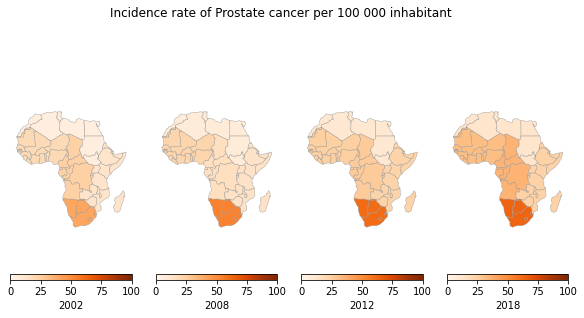

In [22]:
cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('YlOrRd')
#cmap = cm.get_cmap('Greens')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('Set2')

vmin, vmax = 0, 100
cmap = cm.get_cmap('Oranges')
#, vmin=vmin, vmax=vmax
#plt.savefig('Figures/.png')

#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of Prostate cancer per 100 000 inhabitant')
# Make the CartoPy plot
line1 = africa.plot(column="Prostate2002", cmap=cmap, legend=True, linewidth=0.4, ax=axs[0], edgecolor='0.6',
            legend_kwds={'label': "2002", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line2 = africa.plot(column="Prostate2008", cmap=cmap, legend=True, linewidth=0.4, ax=axs[1], edgecolor='0.6',
            legend_kwds={'label': "2008", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line3 = africa.plot(column="Prostate2012", cmap=cmap, legend=True, linewidth=0.4, ax=axs[2], edgecolor='0.6',
            legend_kwds={'label': "2012", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line4 = africa.plot(column="Prostate2018", cmap=cmap, legend=True, linewidth=0.4, ax=axs[3], edgecolor='0.6',
            legend_kwds={'label': "2018", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)
#plt.colorbar(label='log$_{10}$(population)')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
#plt.savefig('Figures/prost1.png')
plt.show()

In [23]:
cancer

,2002,2008,2012,2018
North,5.8,8.1,10.6,13.2
West,19.3,22.2,25.1,31.9
Central,24.5,16.4,27.0,35.9
East,13.8,14.5,23.3,23.9
South,40.5,53.9,61.8,64.1


FileNotFoundError: ignored

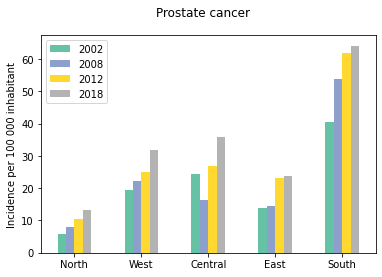

In [24]:
cmap = cm.get_cmap('Set2')
#cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('YlOrRd')
ax = cancer.plot.bar(rot=0, cmap=cmap)
plt.suptitle('Prostate cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.savefig('Figures/prost2.png')
plt.show()
cancer.transpose().plot.area(cmap=cmap)
plt.suptitle('Prostate cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Years from 2002 to 2018')
#plt.savefig('Figures/prost3.png')
plt.show()

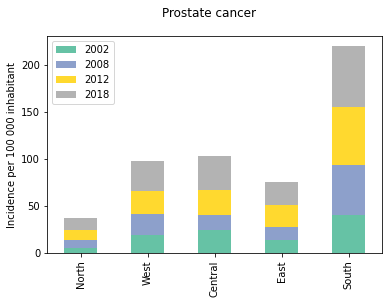

In [25]:
cancer.plot(kind='bar', stacked=True, cmap=cmap)
plt.suptitle('Prostate cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
#plt.savefig('Figures/prost4.png')
plt.show()

In [26]:
fat

,2002,2008,2012,2018
North,84.482759,76.543210,66.037736,43.939394
West,82.901554,82.432432,84.462151,58.307210
Central,86.122449,81.707317,89.629630,63.231198
East,85.507246,80.689655,80.257511,61.924686
South,55.308642,35.807050,39.482201,41.809672


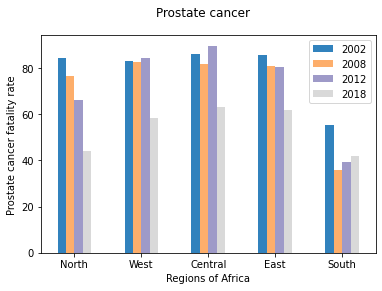

In [27]:
cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('YlOrRd')
#cmap = cm.get_cmap('Set2')
fat.plot.bar(rot=0, cmap=cmap)
plt.xlabel('Regions of Africa')
plt.suptitle('Prostate cancer')
plt.ylabel('Prostate cancer fatality rate')
plt.show()